In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix,accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt


In [39]:
df = pd.read_csv('combined-dataset.csv')
print (df.columns)
df.head(20)

Index(['gold', 'platinum', 'palladium', 'tungsten', 'silver', 'y'], dtype='object')


,gold,platinum,palladium,tungsten,silver,y
0,43520,22464,21397,20007,24313,1
1,43534,22031,21513,19904,24052,1
2,43534,22554,21243,20086,24285,1
3,43588,22347,21179,20285,24279,1
4,75,22583,21516,19634,24203,1
5,23144,21949,20841,20448,24490,1
6,27635,22280,21984,19521,24288,1
7,26400,22167,20833,20764,24113,1
8,27318,23069,21733,19636,24339,1
9,26469,21838,20803,20391,24088,1


In [40]:

X = df.iloc[:,:5].values
Y = df.iloc[:,5:6].values
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4,random_state = 42)

In [41]:
print('The shape of our features is:', df.shape)
df.describe()


The shape of our features is: (233700, 6)


,gold,platinum,palladium,tungsten,silver,y
count,233700.000000,233700.000000,233700.000000,233700.000000,233700.000000,233700.000000
mean,24367.802991,21456.918691,21370.395156,21985.624801,22753.481292,6.289474
std,3265.435261,2466.196488,1429.601283,2787.012963,4634.859332,3.912928
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,22796.000000,21127.000000,21133.000000,20822.000000,21915.000000,3.000000
50%,23543.000000,21611.000000,21522.000000,22834.000000,22543.000000,6.000000
75%,25144.000000,22135.000000,21806.000000,23404.000000,23542.000000,10.000000
max,44200.000000,44112.000000,44069.000000,44359.000000,44571.000000,13.000000


NameError: name 'train' is not defined

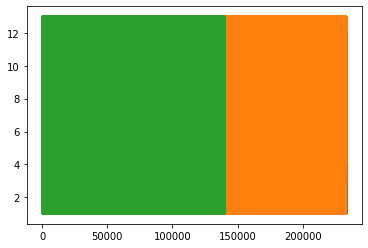

In [65]:
import keras

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=190)
#Train the model using the training sets y_pred=clf.predict(X_test)
model=clf.fit(X_train,y_train.ravel())
y_pred=clf.predict(X_test)


plt.plot(np.arange(len(y_pred)) + len(y_train),y_test)
plt.plot(np.arange(len(y_pred)) + len(y_train), y_pred)
plt.plot(y_train)

# you seemed to mess up the labels
plt.legend(['y_test', 'y_test_pred', 'y_train','y_train_pred'])

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix",confusion_matrix(y_test, y_pred))
print("Confusion matrix",classification_report(y_test, y_pred))


Accuracy: 0.7241548994437312
Confusion matrix [[11585   502  1065   154   290   103    27   407   792   189     7   145
    226]
 [  655  3462     1    76  1013    44     0   712   861    15     0    33
    417]
 [  725     1  6552     6     3     4    17     2     2     4    16    20
      0]
 [  368   168    14  2078   433   875     7   220   129   190     4   285
     95]
 [  381   955    11   207  4357    72     1   758   365    13     2    20
    212]
 [  228    54    10   507   117  3349     2    40    32   325     2   278
     16]
 [   13     0    15     0     0     0  7228     0     5     7    56     5
      0]
 [  639   792     6   149   879    59     0  3449   937    15     1    50
    346]
 [  577   862     5    41   280    14     2   604  4635    14     3    73
    398]
 [  134     7     9    69    11   132     4    12    14  6122     3   121
      3]
 [    2     0     3     1     0     0    43     0     1     0  4932     5
      0]
 [  188    32    20   217    20   437    

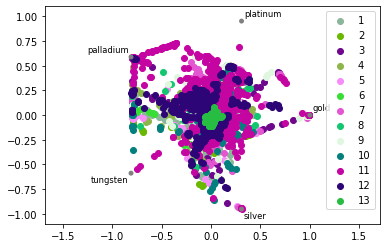

In [44]:
from pandas.plotting import radviz
plt.figure();
radviz(df, "y");

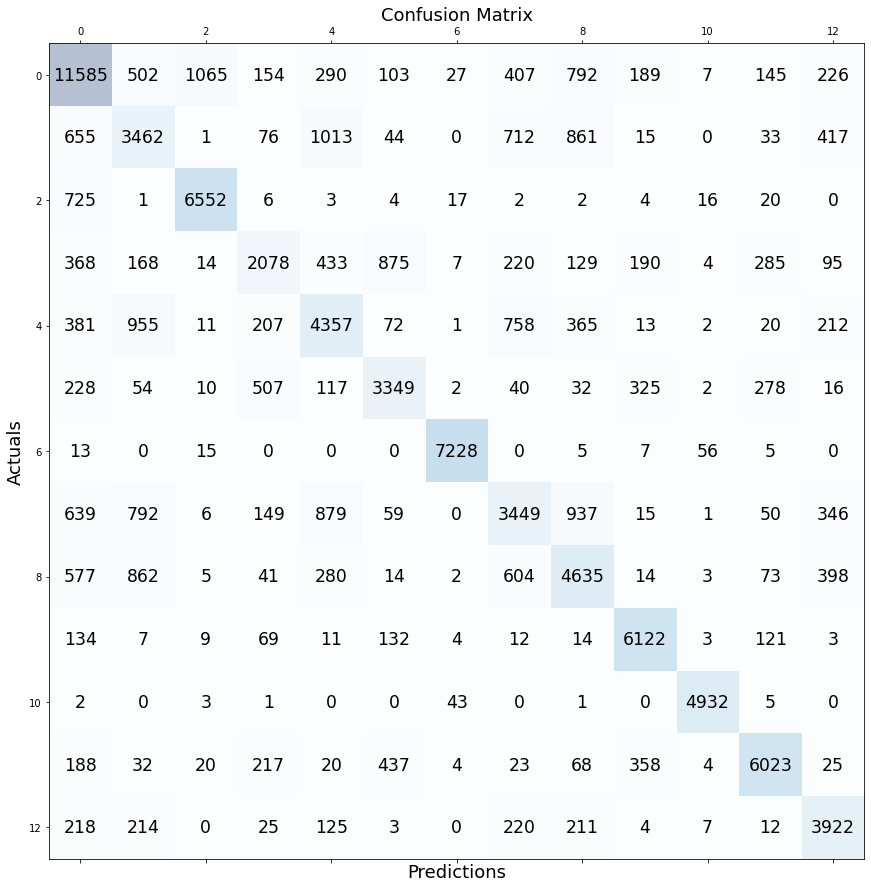

In [49]:
conf=confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(15, 15))
ax.matshow(conf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        ax.text(x=j, y=i,s=conf[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


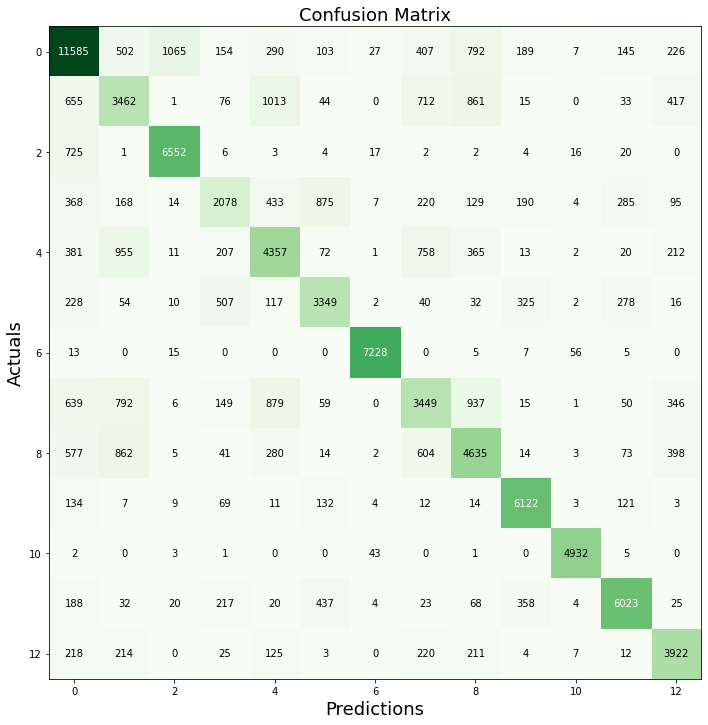

In [55]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=conf, figsize=(12, 12), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'show'